In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import datetime
import squarify

In [50]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [19]:
df.head(6)

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
5,미국,컴퓨터 및 주변기기,면세점 이외,2018.2/4,1553


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [51]:
df["백만"] = df["데이터"]
df.head(5)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033


In [52]:
df['연도'] = df['시점'].str.split('.').str[0].astype('int64')
df['분기'] = df['시점'].str.split('/').str[0].str.split('.').str[1].astype('int64')
df.head(6)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,1
5,미국,컴퓨터 및 주변기기,면세점 이외,2018.2/4,1553,1553,2018,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
 5   백만       2772 non-null   int64 
 6   연도       2772 non-null   int64 
 7   분기       2772 non-null   Int64 
dtypes: Int64(1), int64(3), object(4)
memory usage: 176.1+ KB


In [53]:
df[["백만","연도","분기"]].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [54]:
df.head(6)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,1
5,미국,컴퓨터 및 주변기기,면세점 이외,2018.2/4,1553,1553,2018,2


In [55]:
pr = pd.pivot_table(df, values='백만', index='국가(대륙)별', columns='연도', aggfunc='sum')
pr

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


In [56]:
pr2 = pr.T
pr2

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
연도,,,,,,,,,
2017,41571,18989,142292,66163,31068,125442,167240,10245,8030
2018,36141,17520,156312,76450,36826,178094,182068,11669,8019
2019,40950,13191,186617,82930,39008,189330,210418,12981,9325
2020,44438,16255,255384,105360,39865,220730,289446,12563,11467
2021,57959,16841,277579,94150,32349,280029,194380,8298,6164
2022,19501,5044,103416,38072,9019,131771,98572,2629,1389


연도            2017    2018    2019    2020    2021    2022
국가(대륙)별                                                   
기타           41571   36141   40950   44438   57959   19501
대양주          18989   17520   13191   16255   16841    5044
미국          142292  156312  186617  255384  277579  103416
아세안(ASEAN)   66163   76450   82930  105360   94150   38072
유럽연합(EU)     31068   36826   39008   39865   32349    9019
일본          125442  178094  189330  220730  280029  131771
중국          167240  182068  210418  289446  194380   98572
중남미          10245   11669   12981   12563    8298    2629
중동            8030    8019    9325   11467    6164    1389


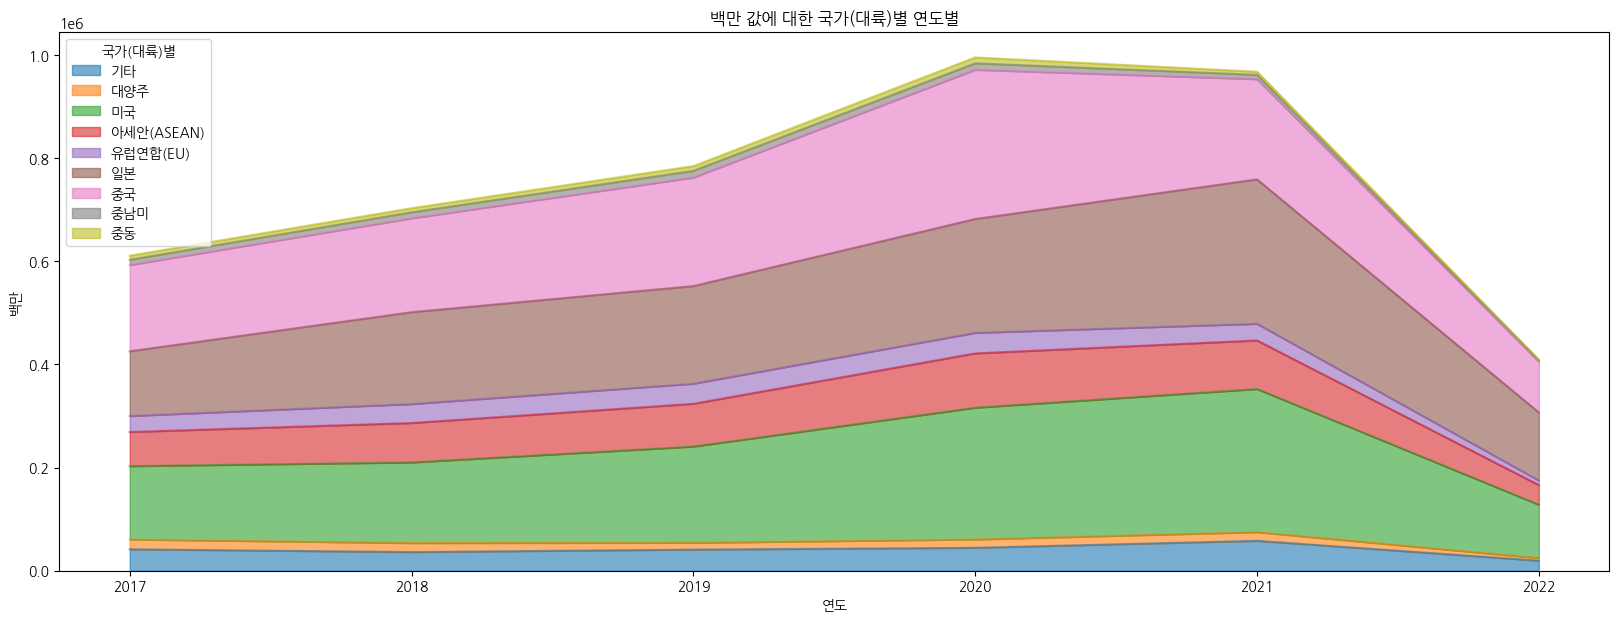

In [57]:
print(pr)
pr2.plot(kind='area', figsize = (20,7),alpha = 0.6)  # marker='o'는 데이터 포인트를 표시하는 마커를 추가합니다.
plt.title('백만 값에 대한 국가(대륙)별 연도별')
plt.xlabel('연도')
plt.ylabel('백만')
plt.legend(title='국가(대륙)별', loc='upper left')  # 범례 위치 설정
plt.show()

#### '국가(대륙)별' 여러 그룹으로 나누어 각 그룹이 쌓여 영역을 형성하는 "스택플롯" 시각화 방법을 나타냈습니다. 중국, 일본, 미국 영역이 다른 나라 영역보다 큽니다. 

Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [170]:
twenty = df[df["연도"] == 2020]
twenty.head(5)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,1818,2020,1


In [171]:
twenty.groupby("국가(대륙)별")["백만"].sum()

국가(대륙)별
기타             44438
대양주            16255
미국            255384
아세안(ASEAN)    105360
유럽연합(EU)       39865
일본            220730
중국            289446
중남미            12563
중동             11467
Name: 백만, dtype: int64

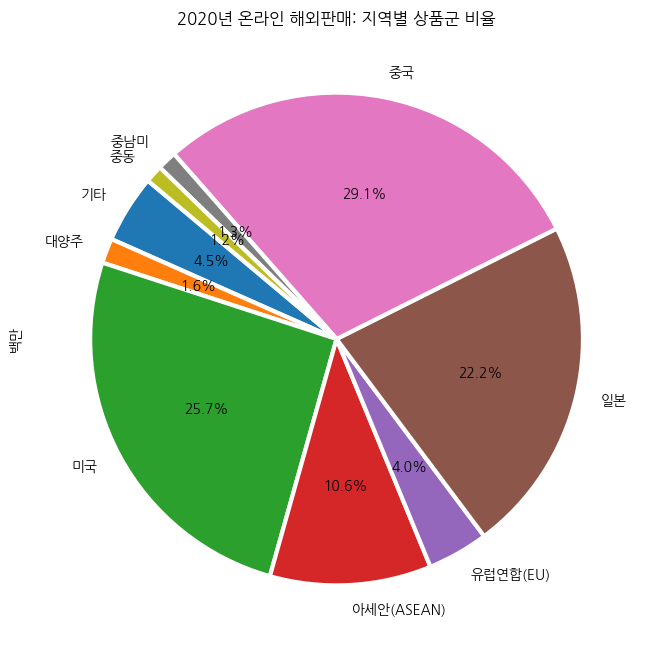

In [183]:

ax = twenty.groupby("국가(대륙)별")["백만"].sum()
ax.plot(kind = 'pie',autopct='%1.1f%%', legend=False, figsize=(8, 8),startangle = 140, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('2020년 온라인 해외판매: 지역별 상품군 비율')
plt.show()

#### "국가(대륙)별"과 "백만" 값을 groupby로 합계 확률를 알고 싶어 파이차트를 그렸습니다. 2020년 지역별 상품군 비율에서는 중국 29.1%가 다른 나라에 비에 높습니다. 

Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
 

In [184]:
df2 = df[df["연도"] != 2022]
df2["연도"].value_counts()

연도
2017    504
2018    504
2019    504
2020    504
2021    504
Name: count, dtype: int64

In [87]:
df2.head(6)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,4
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,4
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,4
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,4
5,미국,컴퓨터 및 주변기기,면세점 이외,2018.2/4,1553,1553,2018,4


In [185]:
df4 = df2[(df2["국가(대륙)별"] == "중국") | (df2["국가(대륙)별"] == "일본") | (df2["국가(대륙)별"] == "미국")]
df4.head(5)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,1


In [121]:
df4["상품군별"].value_counts()

상품군별
컴퓨터 및 주변기기      60
가전·전자·통신기기      60
소프트웨어           60
서 적             60
사무·문구           60
음반·비디오·악기       60
의류 및 패션 관련상품    60
스포츠·레저용품        60
화장품             60
아동·유아용품         60
음·식료품           60
농축수산물           60
생활용품 및 자동차용품    60
기 타             60
Name: count, dtype: int64

In [186]:
df5 = df4[(df4["상품군별"] == "음반·비디오·악기") | (df4["상품군별"] == "의류 및 패션 관련상품") | (df4["상품군별"] == "화장품")]
df5.head(6)

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2362,2018,1
115,미국,음반·비디오·악기,면세점 이외,2018.2/4,3014,3014,2018,2


In [190]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 110 to 811
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  180 non-null    object
 1   상품군별     180 non-null    object
 2   판매유형별    180 non-null    object
 3   시점       180 non-null    object
 4   데이터      180 non-null    int64 
 5   백만       180 non-null    int64 
 6   연도       180 non-null    int64 
 7   분기       180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 12.7+ KB


In [195]:
df5['연도'] = pd.to_datetime(df5['연도'], format='%Y')
df5['연도'] = df5['연도'].dt.strftime('%Y')

/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_1172/1317413936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['연도'] = pd.to_datetime(df5['연도'], format='%Y')
/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_1172/1317413936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['연도'] = df5['연도'].dt.strftime('%Y')


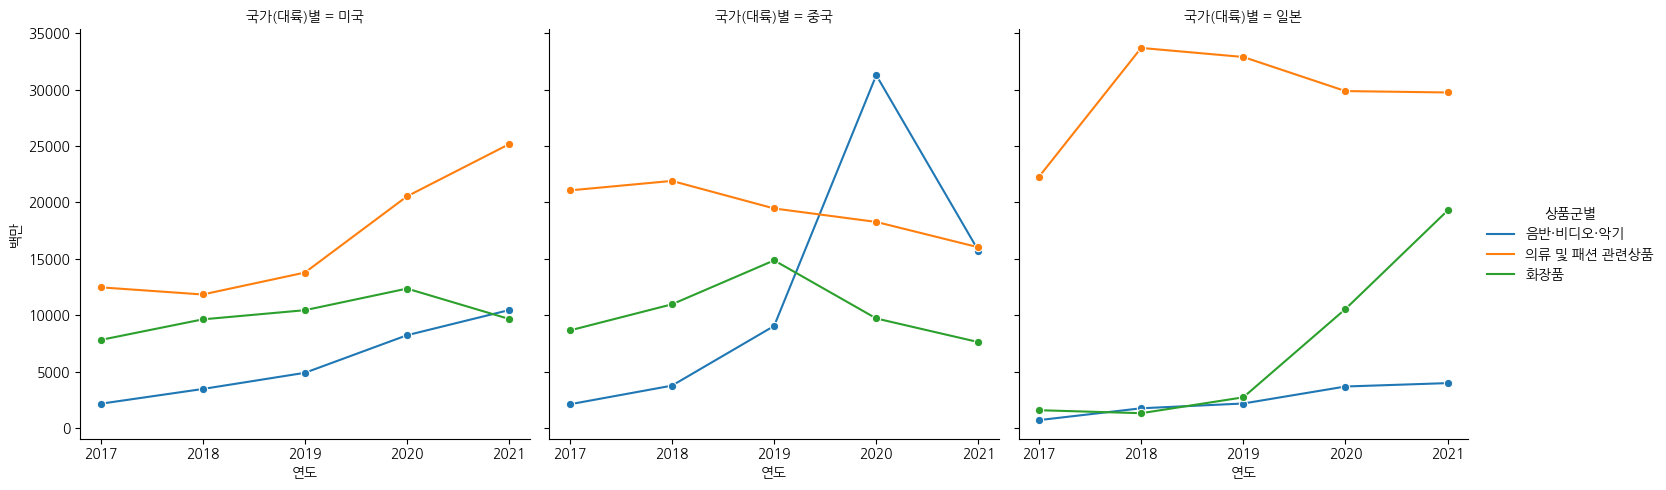

In [198]:
g = sns.relplot(df5, x = "연도", y = "백만", hue = "상품군별", col = "국가(대륙)별", kind = "line", marker = 'o', errorbar =None)

Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [2]:
usecols = ['종목별(1)','필기접수(명)','필기응시(명)','필기합격(명)','필기합격률(%)','실기접수(명)','실기응시(명)','실기합격(명)','실기합격률(%)']

In [3]:
xf = pd.read_excel("종목별_시험현왕.xlsx", header = 0 , names = usecols)
xf

/Users/youngjinseo/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종목별(1),필기접수(명),필기응시(명),필기합격(명),필기합격률(%),실기접수(명),실기응시(명),실기합격(명),실기합격률(%)
0,종목별(1),필기접수 (명),필기응시 (명),필기합격 (명),필기합격률 (%),실기접수 (명),실기응시 (명),실기합격 (명),실기합격률 (%)
1,계,2807962,2079866,945713,45.47,2024829,1712589,714533,41.72
2,기술사,26805,21941,1658,7.56,2910,2894,1508,52.11
3,기능장,24891,21082,11509,54.59,20835,18935,5746,30.35
4,기사,693006,454109,194543,42.84,385044,316399,123771,39.12
5,산업기사,348124,228600,87434,38.25,144205,120129,53968,44.93
6,기능사,1068660,865694,442563,51.12,879712,769989,384509,49.94
7,1급,354313,259274,95740,36.93,357676,292036,57320,19.63
8,2급,288052,225761,110256,48.84,225606,184312,84424,45.8
9,3급,3365,2845,1670,58.7,8397,7517,3060,40.71


In [27]:
xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   종목별(1)    11 non-null     object
 1   필기접수(명)   11 non-null     object
 2   필기응시(명)   11 non-null     object
 3   필기합격(명)   11 non-null     object
 4   필기합격률(%)  11 non-null     object
 5   실기접수(명)   11 non-null     object
 6   실기응시(명)   11 non-null     object
 7   실기합격(명)   11 non-null     object
 8   실기합격률(%)  11 non-null     object
dtypes: object(9)
memory usage: 920.0+ bytes


In [4]:
xf = xf.iloc[1:]
xf

,종목별(1),필기접수(명),필기응시(명),필기합격(명),필기합격률(%),실기접수(명),실기응시(명),실기합격(명),실기합격률(%)
1,계,2807962,2079866,945713,45.47,2024829,1712589,714533,41.72
2,기술사,26805,21941,1658,7.56,2910,2894,1508,52.11
3,기능장,24891,21082,11509,54.59,20835,18935,5746,30.35
4,기사,693006,454109,194543,42.84,385044,316399,123771,39.12
5,산업기사,348124,228600,87434,38.25,144205,120129,53968,44.93
6,기능사,1068660,865694,442563,51.12,879712,769989,384509,49.94
7,1급,354313,259274,95740,36.93,357676,292036,57320,19.63
8,2급,288052,225761,110256,48.84,225606,184312,84424,45.8
9,3급,3365,2845,1670,58.7,8397,7517,3060,40.71
10,단일등급,746,560,340,60.71,444,378,227,60.05


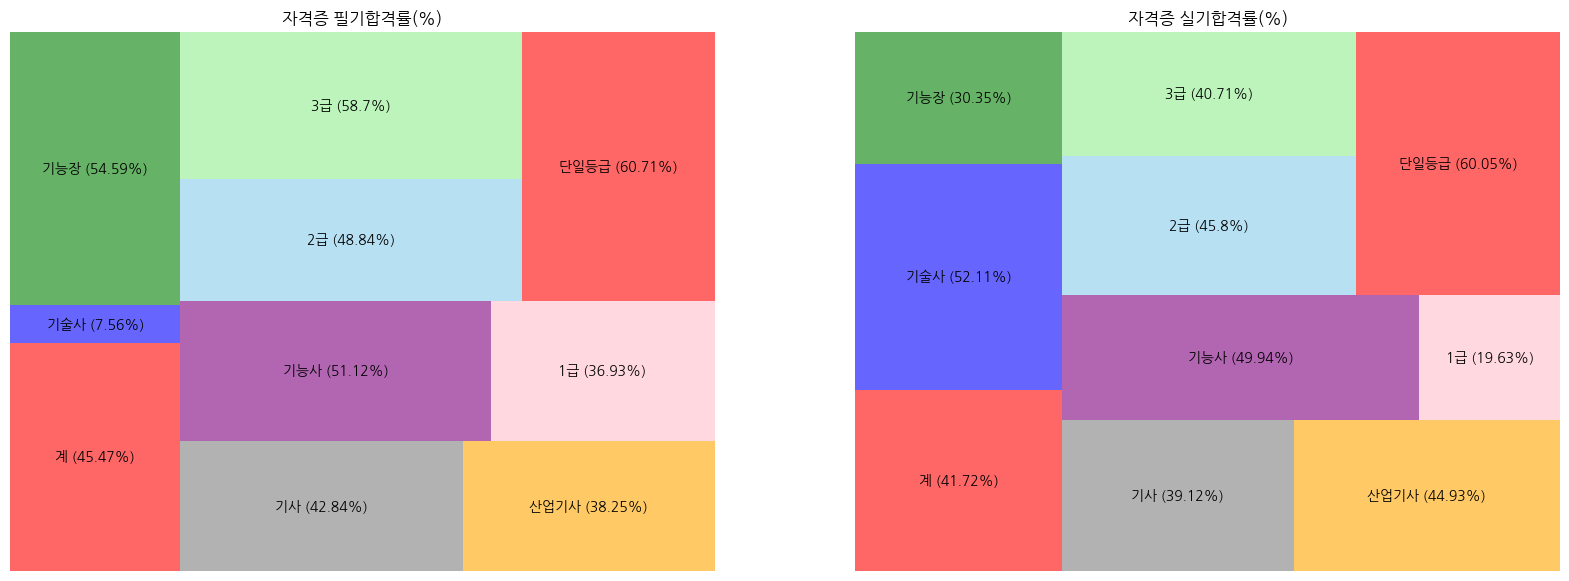

In [5]:
#필기합격률 %
color = ['red','blue','green','grey','orange','purple','pink','skyblue','lightgreen']
labels = [f"{subject} ({percentage}%)" for subject, percentage in zip(xf['종목별(1)'], xf['필기합격률(%)'])]

#실기합격률 %
color2 = ['red','blue','green','grey','orange','purple','pink','skyblue','lightgreen']
labels2 = [f"{subject} ({percentage}%)" for subject, percentage in zip(xf['종목별(1)'], xf['실기합격률(%)'])]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,7))

ax1.set_title('자격증 필기합격률(%)')
squarify.plot(sizes = xf['필기합격률(%)'], label = labels , alpha = 0.6, color = color, ax = ax1)

ax2.set_title("자격증 실기합격률(%)")
squarify.plot(sizes = xf['실기합격률(%)'], label = labels2 , alpha = 0.6, color = color2, ax = ax2)

ax1.axis('off')
ax2.axis('off')
plt.show()

### 필기 시험에서는 단일 등급이 가장 높은 합격률을 기록했으며(60.71%), 이어서 3급(58.7%), 기능사(51.12%), 그리고 기능자(54.59%)가 높은 순으로 나타났습니다. 반면에 실기 시험에서는 기술사(52.11%), 단일 등급(60.05%), 기능사(49.94%)가 높은 합격률을 기록했습니다.